# Growth Trajectory and Projection

India's GBIF contributions have grown exponentially in recent years. Here we fit a growth model and project future record counts.

In [1]:
import sys; sys.path.insert(0, ".")
from _shared import *
from scipy.optimize import curve_fit
setup_plotting()

india_df = pd.read_parquet(CACHE_DIR / "india_df.parquet")

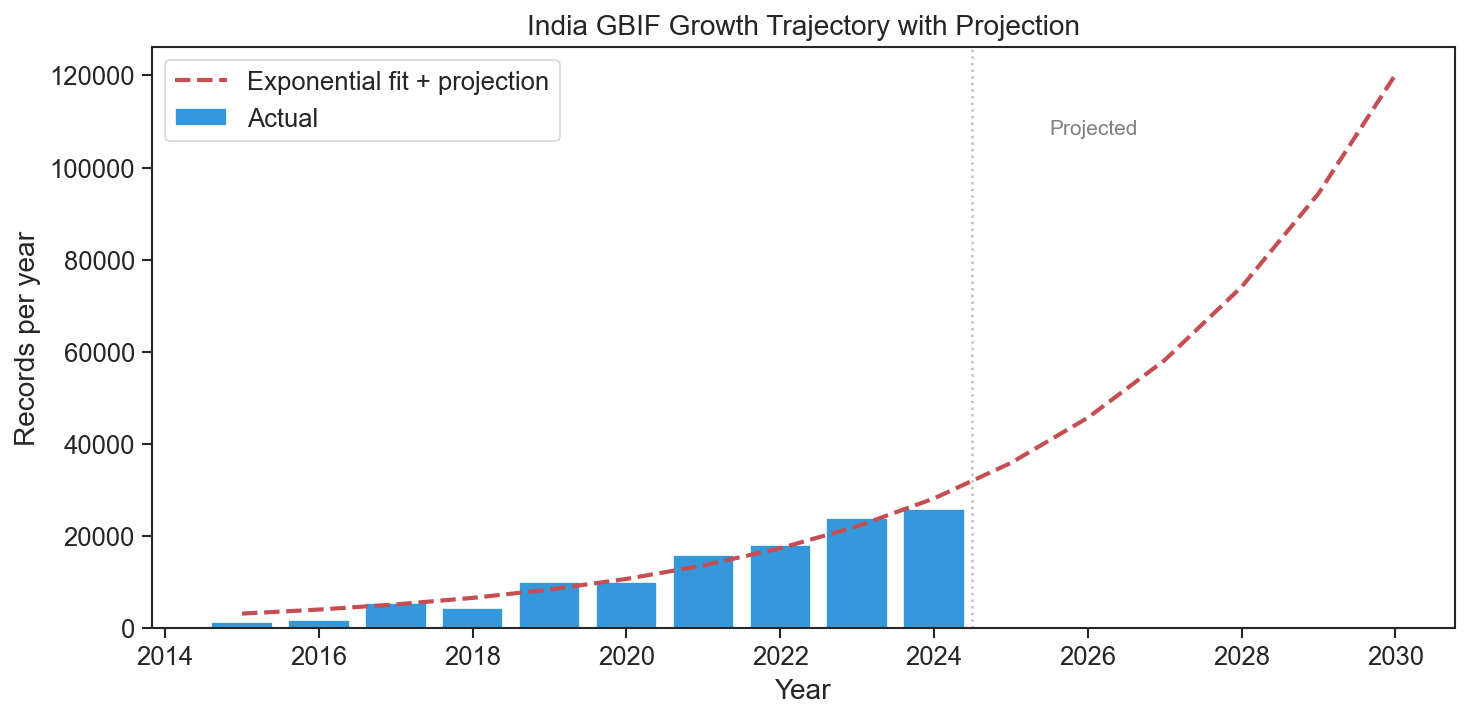

Fitted annual growth rate: 24.2%
Projected records in 2030: ~120,122


In [2]:
# Exponential growth fit with projection
yearly = (
    india_df.dropna(subset=["year"])
    .query("2015 <= year <= 2024")
    .groupby("year")
    .size()
)
yearly.index = yearly.index.astype(int)


def exp_growth(x, a, b):
    return a * np.exp(b * (x - 2015))


popt, pcov = curve_fit(exp_growth, yearly.index, yearly.values, p0=[1000, 0.3])
future_years = np.arange(2015, 2031)
projected = exp_growth(future_years, *popt)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(yearly.index, yearly.values, color="#3498db", label="Actual", zorder=2)
ax.plot(
    future_years, projected, "r--", linewidth=2,
    label="Exponential fit + projection", zorder=3,
)
ax.axvline(x=2024.5, color="gray", linestyle=":", alpha=0.5)
ax.text(2025.5, ax.get_ylim()[1] * 0.85, "Projected", fontsize=10, color="gray")
ax.set_xlabel("Year")
ax.set_ylabel("Records per year")
ax.set_title("India GBIF Growth Trajectory with Projection")
ax.legend()
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

print(f"Fitted annual growth rate: {popt[1]:.1%}")
print(f"Projected records in 2030: ~{exp_growth(2030, *popt):,.0f}")